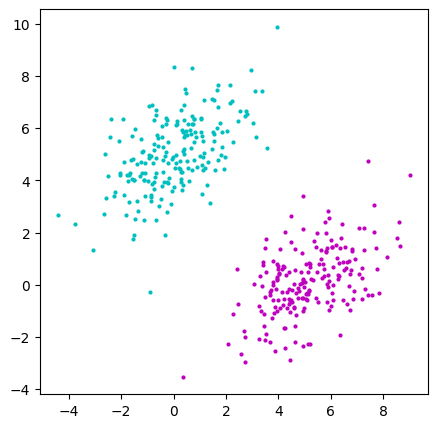

In [1]:
import matplotlib.pyplot as plt
import numpy as np
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 5]]
m2 = [[5, 0]]
C = [[2, 1], [1, 2]]
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)

In [2]:
X = np.concatenate((X1, X2), axis=0)

In [3]:
labelPos = np.ones(NumDataPerClass)#用于创建所有元素初始化为1的数组
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))


In [5]:
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex,]
yr = y[rIndex]
# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]#label
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;
def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N


(200, 2) (200,) (200, 2) (200,)


In [6]:
# Perceptron learning loop
#
# Random initialization of weights权重的随机初始化
#
w = np.random.randn(2)
print(w)
# What is the performance with the initial random weights?
#
print("Initial Percentage Correct: %6.2f" %(PercentCorrect(X_train, y_train, w)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=1000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
# Select a data item at random
#
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    x = X_train[r,:]
# If it is misclassified, update weights
#
    if (y_train[r] * np.dot(x, w) < 0):
        w += alpha * y_train[r] * x
# Evaluate trainign and test performances for plotting
#
    P_train[iter] = PercentCorrect(X_train, y_train, w);
    P_test[iter] = PercentCorrect(X_test, y_test, w);
print("Percentage Correct After Training: %6.2f %6.2f"
        %(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))


[-1.16227749  0.39132507]
Initial Percentage Correct:  94.00
Percentage Correct After Training:  99.50  99.50


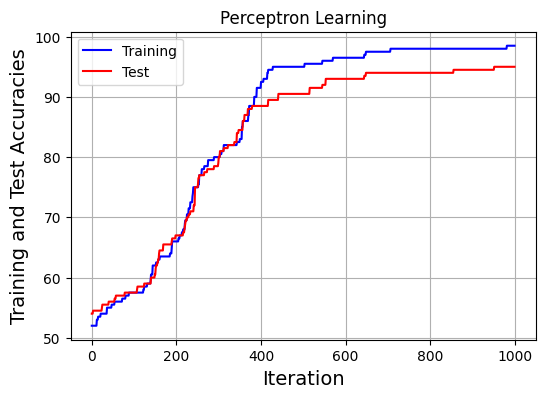

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, "b", label = "Training")
ax.plot(range(MaxIter), P_test, "r", label = "Test")
ax.grid(True)
ax.legend()
ax.set_title("Perceptron Learning")
ax.set_ylabel("Training and Test Accuracies", fontsize=14)
ax.set_xlabel("Iteration", fontsize=14)
plt.savefig("learningCurves.png")


In [24]:
print(NumDataPerClass)
print(w)

200
[-1.56091286  0.55072907]


In [27]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --------------- ------------------------ 4.2/11.0 MB 20.9 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.0 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 20.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---- ----------------------------------- 5.2/44.5 MB 24.5 MB/s eta 0:00:02
   ------- -------------------------------- 8.7/44.5 MB 19.9 MB/s eta 0:00:02
   ------------ --------------------------- 14.2/44.5 MB 21.7 MB/s eta 0:00:02
   ---------------- ----------------------- 18.9/44.5 MB 21.7 MB/s eta 0:00:02
   ------------------- -------------------- 21.5/44.5 MB 20.3 MB/s eta 0:00:02
   ----------------------- ---------------- 25.7/44.5 MB 19.6 MB/s eta 0:00:01
   -------------------------- ------------- 29.9/44.5 MB 20.0 MB/s eta 0:00:01
   ------------------------------ --------- 34.3/44.5 MB 19.8 MB/s eta 0:0

In [3]:
import sklearn

In [8]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model = Perceptron()
model.fit(X_train, y_train)
yh_train = model.predict(X_train)
print("Accuracy on training set: %6.2f" %(accuracy_score(yh_train, y_train)))
yh_test = model.predict(X_test)
print("Accuracy on test set: %6.2f" %(accuracy_score(yh_test, y_test)))
if (accuracy_score(yh_test, y_test) > 0.99):
    print("Wow, Perfect Classification on Separable dataset!")

Accuracy on training set:   1.00
Accuracy on test set:   1.00
Wow, Perfect Classification on Separable dataset!


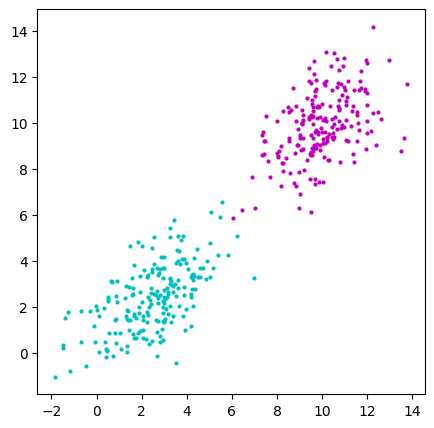

In [9]:
NumDataPerClass = 200

m1 = [[2.5, 2.5]]
m2 = [[10.0, 10.0]]
C = [[2, 1], [1, 2]]

A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)

In [13]:
O = np.ones((2*NumDataPerClass, 1))
X = np.append(X, O, axis=1)
w = np.random.randn(3)
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex,]
yr = y[rIndex]
# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]#label
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;
def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N

(200, 4) (200,) (200, 4) (200,)


(200, 3) (200,) (200, 3) (200,)
[0.13333081 2.26900496 0.46605823]
initial Percentage Correct:  69.50
Percentage Correct After Training:  98.00  95.50


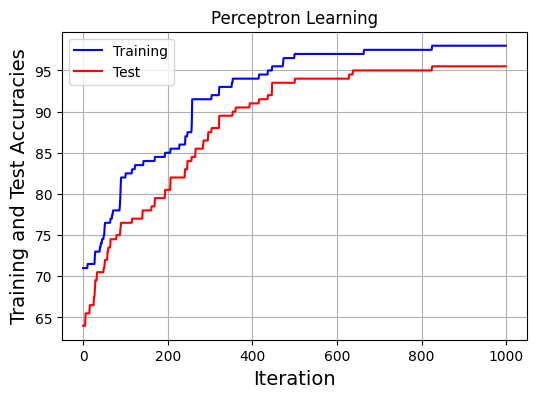

In [16]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 5]]
m2 = [[5, 0]]
C = [[2, 1], [1, 2]]
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2
X = np.concatenate((X1, X2), axis=0)

labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))

O = np.ones((2*NumDataPerClass, 1))
X = np.append(X, O, axis=1)
w = np.random.randn(3)

rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex,]
yr = y[rIndex]
# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;

def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N

# Perceptron learning loop
#
# Random initialization of weights
#
print(w)
# What is the performance with the initial random weights?
#
print("initial Percentage Correct: %6.2f" %(PercentCorrect(X_train, y_train, w)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=1000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
# Select a data item at random
#
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    x = X_train[r,:]
# If it is misclassified, update weights
#
    if (y_train[r] * np.dot(x, w) < 0):
        w += alpha * y_train[r] * x
# Evaluate trainign and test performances for plotting
#
    P_train[iter] = PercentCorrect(X_train, y_train, w);
    P_test[iter] = PercentCorrect(X_test, y_test, w);
print("Percentage Correct After Training: %6.2f %6.2f"
        %(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, "b", label = "Training")
ax.plot(range(MaxIter), P_test, "r", label = "Test")
ax.grid(True)
ax.legend()
ax.set_title("Perceptron Learning")
ax.set_ylabel("Training and Test Accuracies", fontsize=14)
ax.set_xlabel("Iteration", fontsize=14)
plt.savefig("learningCurves.png")


In [18]:
!pip install pandas

In [31]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
occupancy_detection = fetch_ucirepo(id=357) 
  
# data (as pandas dataframes) 
X = occupancy_detection.data.features 
y = occupancy_detection.data.targets 
  
# metadata 
print(occupancy_detection.metadata) 
  
# variable information 
print(occupancy_detection.variables) 


{'uci_id': 357, 'name': 'Occupancy Detection ', 'repository_url': 'https://archive.ics.uci.edu/dataset/357/occupancy+detection', 'data_url': 'https://archive.ics.uci.edu/static/public/357/data.csv', 'abstract': 'Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 20560, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Occupancy'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Apr 13 2024', 'dataset_doi': '10.24432/C5X01N', 'creators': ['Luis Candanedo'], 'intro_paper': {'ID': 470, 'type': 'NATIVE', 'title': 'Accurate occupancy detection of an office room from light, temperature, humidity and CO2

In [32]:
X.describe()

,date,Temperature,Humidity,Light,CO2,HumidityRatio
count,20562,20562,20562,20562,20562,20562
unique,20561,486,2481,1906,5168,9690
top,Temperature,20.39,30.39,0,439,0.00484624668845129
freq,2,1050,267,12772,139,87


In [33]:
print(X.dtypes)

date             object
Temperature      object
Humidity         object
Light            object
CO2              object
HumidityRatio    object
dtype: object


In [34]:
import pandas as pd
# 将所有 object 类型的列转换为数值
for col in X.select_dtypes(include=['object']).columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

C:\Users\26704\AppData\Local\Temp\ipykernel_25436\421285727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')


In [35]:
print(X.dtypes)

date             float64
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
dtype: object


In [36]:
from sklearn.preprocessing import StandardScaler



# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

D:\编程软件\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
D:\编程软件\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
D:\编程软件\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [37]:
from sklearn.model_selection import train_test_split

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [41]:
print(y_train.dtypes)

Occupancy    float64
dtype: object


In [ ]:
# 预测并计算准确率
predictions = np.sign(np.dot(X_test, weights))
accuracy = np.mean(predictions == y_test)
print(f'模型准确率: {accuracy * 100:.2f}%')

In [20]:
print(y_train.dtype)

float64


In [45]:
import pandas as pd

# 使用逗号分隔
file=r"C:\Users\26704\Desktop\datatraining.txt"
data = pd.read_csv(file, delimiter=',')
print(data.head())



                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1  


In [57]:
from sklearn.preprocessing import StandardScaler

# 假设 'features' 包含所有特征列的列表，'target' 是目标变量的名称
X = data.iloc[:, :5]
y = data['Occupancy']



In [58]:
print(X.dtypes)

date            object
Temperature    float64
Humidity       float64
Light          float64
CO2            float64
dtype: object


In [59]:
from sklearn.model_selection import train_test_split

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N


In [63]:
print(len(y_train))

5700
